In [26]:
# Install the dependencies 
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [42]:
# Storing dataset into dataframe
df = pd.read_csv('NFLX.csv')
df = df.tail(300)
df

,Date,Open,High,Low,Close,Adj Close,Volume
707,2018-10-08,345.179993,352.950012,338.109985,349.100006,349.100006,12375500
708,2018-10-09,348.480011,358.720001,347.089996,355.709991,355.709991,8755000
709,2018-10-10,353.519989,355.149994,325.390015,325.890015,325.890015,17183100
710,2018-10-11,324.940002,334.200012,315.809998,321.100006,321.100006,16082100
711,2018-10-12,339.570007,341.299988,328.899994,339.559998,339.559998,14870800
...,...,...,...,...,...,...,...
1002,2019-12-10,296.119995,298.940002,292.019989,293.119995,293.119995,10476100
1003,2019-12-11,294.489990,299.429993,294.200012,298.929993,298.929993,5589800
1004,2019-12-12,295.670013,299.170013,295.059998,298.440002,298.440002,4766600
1005,2019-12-13,298.500000,301.799988,297.250000,298.500000,298.500000,3879700


In [43]:
# Get the number of tarding days
df.shape

(300, 7)

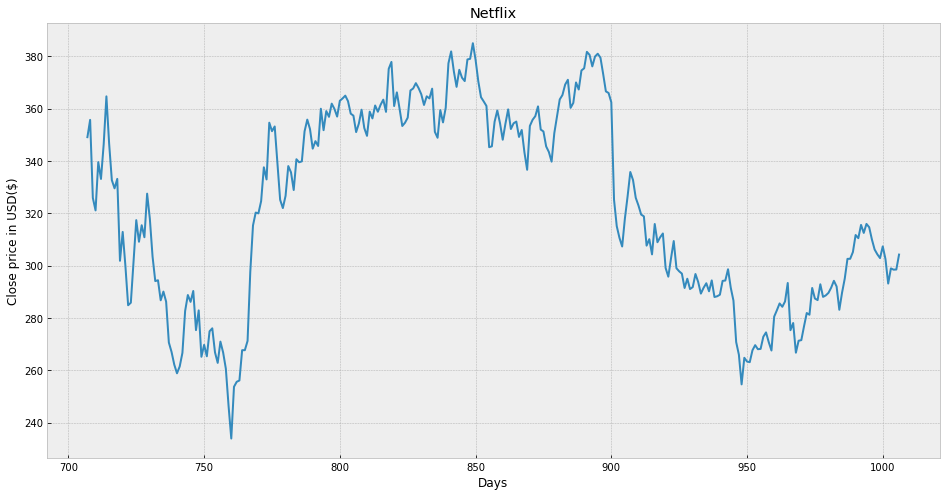

In [44]:
# Visualize the close price data
plt.figure(figsize = (16, 8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close price in USD($)')
plt.plot(df['Close'])
plt.show()

In [45]:
# Get the close price
df = df[['Close']]
df.head()

,Close
707,349.100006
708,355.709991
709,325.890015
710,321.100006
711,339.559998


In [46]:
# Create a variable to predict 'x' days out into future
future_days = 25

# Create a new column(target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail()

C:\Users\djsor\AppData\Local\Temp/ipykernel_8452/3856440511.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = df[['Close']].shift(-future_days)


,Close,Prediction
1002,293.119995,NaN
1003,298.929993,NaN
1004,298.440002,NaN
1005,298.500000,NaN
1006,304.209991,NaN


In [47]:
# Create the feature dataset (X) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[349.100006]
 [355.709991]
 [325.890015]
 [321.100006]
 [339.559998]
 [333.130005]
 [346.399994]
 [364.700012]
 [346.709991]
 [332.670013]
 [329.540009]
 [333.160004]
 [301.829987]
 [312.869995]
 [299.829987]
 [284.839996]
 [285.809998]
 [301.779999]
 [317.380005]
 [309.100006]
 [315.440002]
 [310.839996]
 [327.5     ]
 [317.920013]
 [303.470001]
 [294.070007]
 [294.399994]
 [286.730011]
 [290.059998]
 [286.209991]
 [270.600006]
 [266.980011]
 [262.130005]
 [258.820007]
 [261.429993]
 [266.630005]
 [282.649994]
 [288.75    ]
 [286.130005]
 [290.299988]
 [275.329987]
 [282.880005]
 [265.140015]
 [269.700012]
 [265.320007]
 [274.880005]
 [276.019989]
 [266.839996]
 [262.799988]
 [270.940002]
 [266.769989]
 [260.579987]
 [246.389999]
 [233.880005]
 [253.669998]
 [255.570007]
 [256.079987]
 [267.660004]
 [267.660004]
 [271.200012]
 [297.570007]
 [315.339996]
 [320.269989]
 [319.959991]
 [324.660004]
 [337.589996]
 [332.940002]
 [354.640015]
 [351.390015]
 [353.190002]
 [339.100006]
 [325.

C:\Users\djsor\AppData\Local\Temp/ipykernel_8452/597003940.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [48]:
# Create a target variable (y) and convert it to a numpy array and get all the target values except the last 'x' rows
y = np.array(df['Prediction'])[:-future_days]
print(y)

[294.070007 294.399994 286.730011 290.059998 286.209991 270.600006
 266.980011 262.130005 258.820007 261.429993 266.630005 282.649994
 288.75     286.130005 290.299988 275.329987 282.880005 265.140015
 269.700012 265.320007 274.880005 276.019989 266.839996 262.799988
 270.940002 266.769989 260.579987 246.389999 233.880005 253.669998
 255.570007 256.079987 267.660004 267.660004 271.200012 297.570007
 315.339996 320.269989 319.959991 324.660004 337.589996 332.940002
 354.640015 351.390015 353.190002 339.100006 325.160004 321.98999
 326.670013 338.049988 335.660004 328.899994 340.660004 339.5
 339.850006 351.339996 355.809998 352.190002 344.709991 347.570007
 345.730011 359.970001 351.769989 359.070007 356.869995 361.920013
 359.910004 356.970001 363.019989 363.910004 364.970001 362.869995
 358.100006 357.320007 351.040009 354.299988 359.609985 352.600006
 349.600006 358.859985 356.269989 361.209991 358.820007 361.459991
 363.440002 358.779999 375.220001 377.869995 361.01001  366.230011
 

In [49]:
# Split the training data into 75% training and 25% testing 
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [50]:
# Create the models
# Crete the Decision Tree Regressor Model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Create the Linear Regression Model
lr = LinearRegression().fit(x_train, y_train)

In [51]:
# Get the last 'x' rows of feature dataset
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

C:\Users\djsor\AppData\Local\Temp/ipykernel_8452/1114137817.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x_future = df.drop(['Prediction'], 1)[:-future_days]


array([[274.459991],
       [270.720001],
       [267.529999],
       [280.480011],
       [282.929993],
       [285.529999],
       [284.25    ],
       [286.279999],
       [293.350006],
       [275.299988],
       [278.049988],
       [266.690002],
       [271.269989],
       [271.5     ],
       [276.820007],
       [281.859985],
       [281.209991],
       [291.450012],
       [287.410004],
       [286.809998],
       [292.859985],
       [288.029999],
       [288.589996],
       [289.570007],
       [291.570007]])

In [52]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show the model linear regression prediction
lr_prediction =  lr.predict(x_future)
print(lr_prediction)

[294.179993 292.01001  283.109985 304.320007 295.029999 302.570007
 275.329987 305.160004 274.459991 337.589996 315.549988 312.48999
 315.929993 315.929993 309.98999  304.320007 304.320007 302.859985
 307.350006 302.5      293.119995 298.929993 298.440002 298.5
 304.209991]

[290.59722429 288.32383006 286.38475211 294.25655993 295.74580855
 297.32625091 296.54818938 297.7821467  302.07972854 291.10782574
 292.77944361 285.87415066 288.65814634 288.79796107 292.03178608
 295.09539237 294.70028634 300.9247962  298.46903272 298.10431244
 301.78186386 298.84590352 299.18630389 299.7820144  300.99773648]


C:\Users\djsor\AppData\Local\Temp/ipykernel_8452/1000162042.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = prediction


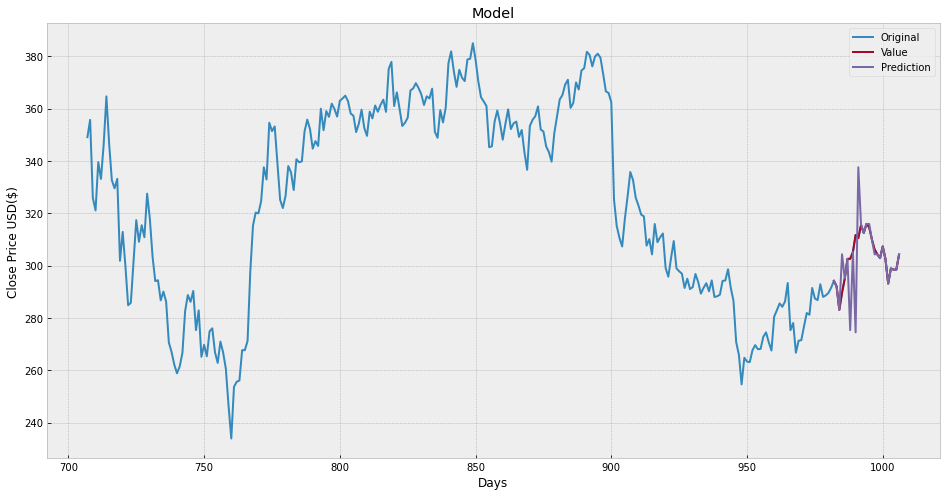

In [53]:
# Visualize the data
prediction = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = prediction

plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original', 'Value', 'Prediction'])
plt.show()

C:\Users\djsor\AppData\Local\Temp/ipykernel_8452/623224369.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = prediction


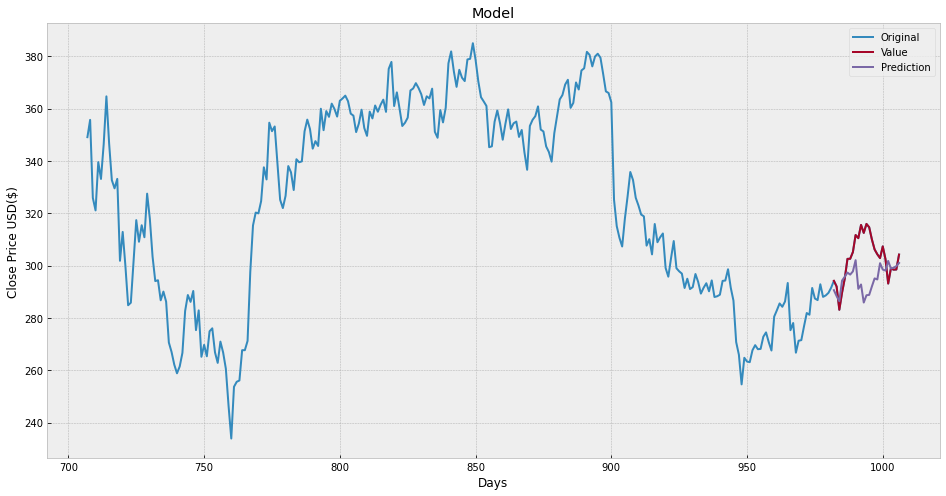

In [54]:
# Visualize the data
prediction = lr_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = prediction

plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Original', 'Value', 'Prediction'])
plt.show()